# Rotating Cube

This is a notebook version of the "examples/basics/visuals/cube.py" example.

In [2]:
import vispy
vispy.use("jupyter_rfb")

RFBOutputContext()


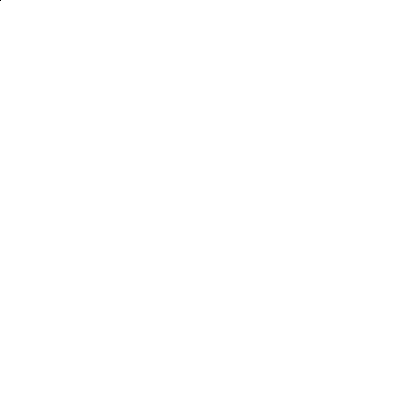

CanvasBackend(css_height='400px', css_width='400px')

In [4]:
import sys

from vispy import app, gloo
from vispy.visuals import CubeVisual, transforms


class Canvas(app.Canvas):
    def __init__(self):
        app.Canvas.__init__(self, 'Cube', keys='interactive',
                            size=(400, 400))

        self.cube = CubeVisual((1.0, 0.5, 0.25), color='red', edge_color="k")
        self.theta = 0
        self.phi = 0

        # Create a TransformSystem that will tell the visual how to draw
        self.cube_transform = transforms.MatrixTransform()
        self.cube.transform = self.cube_transform

        self.timer = app.Timer('auto', connect=self.on_timer, start=True)

    def on_resize(self, event):
        # Set canvas viewport and reconfigure visual transforms to match.
        vp = (0, 0, self.physical_size[0], self.physical_size[1])
        self.context.set_viewport(*vp)
        self.cube.transforms.configure(canvas=self, viewport=vp)

    def on_draw(self, event):
        gloo.set_viewport(0, 0, *self.physical_size)
        gloo.clear('white', depth=True)

        self.cube.draw()

    def on_timer(self, event):
        self.theta += .5
        self.phi += .5
        self.cube_transform.reset()
        self.cube_transform.rotate(self.theta, (0, 0, 1))
        self.cube_transform.rotate(self.phi, (0, 1, 0))
        self.cube_transform.scale((100, 100, 0.001))
        self.cube_transform.translate((200, 200))
        self.update()


win = Canvas()
win.show()
win

The above implementation uses a timer to continuously update the coordinates of the cube so it appears to rotate. This will go until the timer is stopped which you can do by running:

In [ ]:
win.timer.stop()

You can restart the rotation by calling the `.start()` method on the timer:

In [ ]:
win.timer.start()